# Conversión tiempo a profundidad  y viceversa de datos sísmicos 2D

**Autores**

- **Liliana Vargas Meleza** (lvargasm@imp.mx), Dirección de Servicios en Exploración y Producción
- **Douglas Gómez Reyes** (agomezr@imp.mx), Dirección de Servicios en Exploración y Producción
- **Juan Lara Corona** (jdlara@imp.mx), Dirección de Servicios en Exploración y Producción
- **Sergio Chávez Pérez** (schavez@imp.mx), Dirección de Tecnología de Producto

**Instituto Mexicano del Petróleo**

## 1. Introducción 

En el mercado existen diferentes opciones comerciales para hacer conversión tiempo a profundidad, sin embargo, operan como cajas negras y el usuario tiene poco control del proceso. Por un lado, las soluciones comerciales involucran grandes costos por licenciamiento y, por otro lado, trivializan la conversión de dominio. Este cuaderno de trabajo aborda fundamentos de técnicas de conversión tiempo a profundidad, como la diferencia entre velocidad de propagación y de procesamiento y la diferencia entre conversión a profundidad y migración en profundidad. 

Este flujo de trabajo es una adaptación del trabajo de investigación de Cameron et al. (2008) titulado _Time-to-depth conversion and seismic velocity estimation using time-migration velocity_, y se puede consultar en la dirección: <http://www.reproducibility.org/RSF/book/tccs/time2depth/paper_html/>. Se basa en la paquetería de procesamiento **Madagascar** (<http://www.ahay.org>) y el flujo de procesamiento se encuentra en el archivo de texto _SConstruct_, incluido en la carpeta que contiene este cuaderno de trabajo. 

Para ejecutar la secuencia de procesamiento, el usuario debe tener instalado Madagascar en una estación de trabajo con sistema operativo Linux, preferiblemente, y tener conocimientos básicos de programación. A continuación describimos los aspectos más relevantes de Madagascar y su instalación.

### 1.1 Madagascar 

Las instrucciones de procesamiento se encuentran en el archivo SConstruct y en necesario ejecutarlo antes de usar este cuaderno de trabajo. En una ventana de terminal, ejecutar el archivo SConstruct con la instrucción: **scons view**.
Ejecutar y modificar el flujo de trabajo implementado con Madagascar implica un mayor esfuerzo intelectual, ya que requiere que el usuario tenga conocimientos básicos en programación con Python. El Manual de Operación incluye una descripción de los requisitos técnicos y las instrucciones de instalación de Madagascar. 

### 1.2 Cuaderno de trabajo Jupyter

El Manual de Operación contiene una sección sobre la instalación de Anaconda, una distribución de Python con amplia variedad de paqueterías y dependencias. Al instalar Anaconda se obtiene Jupyter Notebook (cuaderno de trabajo Jupyter).

Los archivos de Madagascar (m8r) están en formato RSF y para manipularlos con Python, a través del cuaderno de trabajo Jupyter, es necesaria una interface de comunicación. Esta interface se llama SWIG (_Simplified Wrapper and Interface Generator_) y es parte de las paqueterías que contiene Anaconda. Para instalar SIWG se escribe la siguiente instrucción en la terminal:  

**conda install SWIG**.

Para visualizar y manipular datos en formato nativo de Madagascar (*X.rsf*), a través del cuaderno de trabajo Jupyter, el usuario debe usar la versión Python 2.7. 

## 2. Conversión tiempo a profundidad 

A pesar de los avances en técnicas de representación sísmica en profundidad, no siempre es posible obtener profundidades con la precisión que requieren los intérpretes. Por lo que el proceso de conversión tiempo a profundidad, y viceversa, sigue siendo un proceso fundamental para disminuir el riesgo exploratorio. Sin embargo, la conversión de dominio sigue siendo para muchos profesionales de la práctica, un proceso cotidiano y trivial. En realidad, es un proceso complejo, cuya precisión depende de muchas variables además del algoritmo de conversión.

Generalmente, las imágenes sísmicas se migran en tiempo con un modelo de velocidad cuadrática media ($V_{RMS}$) y
para convertirlas a profundidad se usan velocidades de intervalo calculadas con la ecuación de Dix. Actualmente, existen técnicas de representación sísmica que pueden manejar datos sísmicos en geología estructuralmente compleja. Sin embargo, no siempre se puede obtener profundidades precisas. De hecho, Jones (2009) recomienda que las imágenes PSDM se transformen a tiempo, con una versión suavizada del modelo de velocidades PSDM y, posteriormente, convertirlas a profundidad de nuevo. Esto es porque los modelos de velocidad que son adecuados para apilar y migrar datos sísmicos no necesariamente reflejan la geología del subsuelo.

Imágenes PSTM requieren de un modelo de velocidad vertical condicionado por la geología para ser convertido a profundidad. Mientras que imágenes PSDM pueden tener profundidades menos precisas, pero la posición lateral de los eventos sísmicos es más precisa que en las imágenes PSTM, además de estar mejor enfocadas.

En este sentido, hay velocidades de procesamiento y velocidades de propagación (con significado físico). Procesamiento de datos y representación sísmica usan un modelo de velocidad que permite enfocar la imagen y, generalmente, la distribución de velocidad es una representación simplificada de la geología (Al-Chalabi, 2014). Para conversión tiempo a profundidad es necesario que estas velocidades sean las de propagación o litológicas. A continuación describimos los tipos de velocidad y cuál de ellas es la indicada para conversión de dominio.

###  2. 1 Velocidades físicas o de propagación

La **velocidad promedio $(V_{AVG})$** se calcula dividiendo la profundidad del objetivo entre el tiempo de viaje de una onda a esa profundidad, suponiendo que los estratos son horizontales y paralelos, por lo tanto, la incidencia de rayos es normal. 

La **velocidad de intervalo** $(V_{INT})$ representa la rapidez con la que se propagan las ondas en un estrato determinado. Se calcula a partir del registro sónico o bien con la ecuación de Dix (1955) a partir de velocidad de procesamiento. 

La **velocidad instantánea** $(V_{INS})$ es la rapidez con la que se propaga un frente de onda en el subsuelo en un tiempo o profundidad específico (Sherif, 2002); es el valor límite al cual tiende la $(V_{INT})$ de una capa de espesor infinitesimal. Tanto $V_{AVG}$ como $V_{INT}$ son una integración de $V_{INS}$ a lo largo de una trayectoria de viaje. 

A estos tipos de velocidad se les llama velocidades de propagación, físicas o litológicas (Fig. 1). 

<img src="velocities_inst_inter_avg.png" title="Figura 1. Velocidades físicas (Tomado de Al-Chalabi, 2014)" width="700"/>
    
**Figura 1**. Velocidades físicas. A) Velocidad promedio, B) Velocidad de intervalo y C) Velocidad instantánea (Tomado de Al-Chalabi, 2014).

### 2.2 Velocidades de procesamiento

La **velocidad de apilamiento** $(V_{STK})$ se determina a partir del análisis de sobretiempo normal por distancia fuente a receptor (NMO). Se utiliza para corregir tiempos de arribo antes de apilar trazas, con el objetivo de  mejorar la relación señal-ruido. 

La **velocidad cuadrática media** $(V_{RMS})$ es una medida estadística de la magnitud de las velocidades de apilamiento.

En la práctica, $V_{RMS}$ es el puente con las velocidades físicas. Por ello es la indicada para convertir datos sísmicos de tiempo a profundidad. Este modelo de velocidad es una simplificación de la distribución de velocidades del subsuelo. 

$V_{STK}$ es igual a $V_{RMS}$ cuando el subsuelo consiste de capas horizontales, paralelas e isótropas. Por otra parte, $V_{RMS}$ difiere de $V_{AVG}$ porque la primera proviene de trazas sísmicas y es ligeramente mayor a la segunda que proviene de registros de pozo. 

La Fig. 2 ilustra dos maneras de obtener velocidades de propagación a partir de velocidades de procesamiento (o de migración).

<img src="pro-vels.png" title="Figura 2. Velocidades de procesamiento (Al-Chalabi, 2014)" width="600"/>

**Figura 2**. Maneras tradicional y moderna de obtener velocidades de propagación a partir de velocidades de procesamiento o migración (Al-Chalabi, 2014).

### 2.3 Migración en profundidad versus conversión a profundidad

Es común que los intérpretes sísmicos confundan el proceso de migración en profundidad con conversión a profundidad. Conversión a profundidad consiste en convertir valores de tiempo de viaje a valores de profundidad usando un modelo de velocidad que tenga un significado físico. Mientras que migración en profundidad genera una imagen sísmica en el dominio de profundidad a partir de un modelo de velocidad que permite enfocar y posicionar reflectores sísmicos. Las profundidades obtenidas a través de migración son diferentes de las profundidades verdaderas en el subsuelo, porque el modelo de velocidad utilizado (velocidad de procesamiento) es una aproximación de la distribución de velocidades verdadera que carece de significado físico (Al-Chalabi, 2014). Las diferencias entre estos procesos se resume en la Tabla 1. 

<img src="PSDMvsDC.PNG" title="Tabla 1. Comparación entre migración en profundidad y conversión a profundidad" width="650"/>

**Tabla 1**. Comparación entre migración en profundidad y conversión a profundidad (modificada de https://www.linkedin.com/pulse/imaging-vs-depth-conversion-rajeshwaran-dandapani/?trk=hp-feed-article-title-publish). 


## 3. Métodos de conversión tiempo a profundidad

### 3.1 Usando velocidad promedio de registros de pozo

El método más común para convertir a profundidad requiere un modelo de velocidad promedio $V_{AVG}$, su limitación es que no toma en cuenta anomalías de velocidad en el subsuelo. El proceso comienza con la profundidad medida en un pozo de calibración y el tiempo de viaje sencillo obtenidos de los datos sísmicos en la posición del pozo. Al dividir profundidad entre tiempo obtenemos una ley de velocidad para cada pozo, las cuales conforman una malla tridimensional de velocidad  (Fig. 3). Note que los valores de velocidad se interpolan con un método estadístico (e.g. kriging) usando horizontes interpretados como guía estructural. En este ejemplo, la interpolación ocurrió en la capa del basamento. Para corregir esto es necesario restringir la interpolación a la cima de basamento y asignar una velocidad constante manualmente. 

Posteriormente, filtramos la velocidad de intervalo para suavizar las interfaces y aplicamos la ecuación de Dix en sentido reverso para obtener velocidad promedio como se ilustra en la Fig. 4. Este modelo de velocidad promedio se multiplica por los tiempos de viaje sencillo del cubo sísmico y obtenemos una malla en profundidad (Kulikowski et al., 2018). Con esta información se convierten superficies y fallas de tiempo a profundidad para interpretación posterior. Sin embargo, la precisión de las profundidades obtenidas es afectada cuando la geología es compleja.

<img src="PERFIL1.jpg" title="Figura 3. Velocidad de intervalo a partir de registros sónicos y extrapolada en todo el cubo sísmico" width="800"/>

**Figura 3**. Velocidad de intervalo a partir de registros sónicos y extrapolada en todo el cubo sísmico. 

<img src="PERFIL1_promedio.jpg" title="Figura 4. Velocidad promedio para conversión tiempo a profundidad a partir del modelo de velocidad de intervalo anterior." width="800"/>

**Figura 4**. Velocidad promedio para conversión tiempo a profundidad a partir del modelo de velocidad de intervalo anterior.

### 3.2 Usando velocidad de migración y rayos de imagen

Cameron et al. (2007,2008) desarrollaron un metodo de conversión tiempo a profundidad a partir de la relación entre velocidad de migración y velocidad de propagación. Esto es posible mediante rayos de imagen y teoría de rayos paraxiales. Hubral (1997) propuso el concepto de rayo de imagen para explicar la interrelación entre los sistemas coordenados de tiempo y profundidad, tomando en cuenta cambios laterales de velocidad. 

Considere un medio estratificado representado por tres superficies ilustradas en la Fig. 5. Un difractor $D$ se encuentra en la superficie más profunda, pares de fuente a receptor ubicados en la superficie libre, denotados por $R_j$, y trayectorias de rayo dibujadas entre fuente a receptor y el difractor. Al graficar los tiempos de viaje doble a lo largo de la trayectoria de los rayos, en función de la ubicación del fuente a receptor, obtenemos la superficie de reflexiones posibles del difractor $D$. El punto $P_R$ representa el tiempo de viaje doble de un rayo que incide y refleja normal a la superficie que contiene al difractor $D$, registrado en la posición $R_R$. A este rayo se le conoce como _rayo normal_. $P_D$ es un punto contenido en la superficie de reflexiones relacionado con una trayectoria vertical al difractor, conocido como _punto de imagen_. Por convención, el punto de imagen coincide con el ápice $P_M$ de la superficie de reflexiones (hiperboloide de aproximación). A la trayectoria $R_M$ se le conoce como **rayo de imagen**, un rayo que viaja desde $D$ hasta la superficie siendo su arribo normal a la superficie. Los rayos de imagen son normales a la superficie libre mientras que los rayos normales son perpendiculares a la superficie que contiene al difractor (Fig. 6). 

<img src="rayo_imagen_hubral.png" title="Figura 5. Modelo de tres capas que ilustra un difractor en el subsuelo $D$ y su superficie de reflexiones en tiempo para defnir rayo de imagen (Hubral, 1977)." width="350"/>

**Figura 5**. Modelo de tres capas que ilustra un difractor en el subsuelo $D$ y su superficie de reflexiones en tiempo para definir rayo de imagen (Hubral, 1977).

<img src="rayos_imagen1.png" title="Figura 6. Modelo de diapiro de sal con rayos de imagen (arriba) y con rayos de incidencia normal (abajo) (Hubral, 1977)." width="500"/>

**Figura 6**. a) Rayos de imagen normales a la superficie y b) rayos de incidencia normal a una superficie en el subsuelo (Hubral, 1977).


El método de Cameron et al. (2007) consiste en trazar rayos de imagen para convertir velocidades de migración en velocidades de propagación (Fig. 7). Un par fuente a receptor localizado en $X_0$ tiene un elipsoide (azul) asociado a la familia de rayos posibles provenientes del punto $X(X_0,t_0)$. De esta familia de rayos se encuentra el rayo de imagen y se trazan rayos paraxiales (casi paralelos) a éste y definen un elipsoide (rojo) asociado al punto de imagen $X$. Al rayo de imagen se le nombra rayo central. Alrededor del rayo central hay un conjunto de rayos, cuya dispersión geométrica se conoce en un tiempo determinado $X(X_0,t_0)$. Entonces, la velocidad de intervalo se puede calcular como la relación de la velocidad instantánea y el valor absoluto de la dispersión geométrica. Los rayos de imagen y sus correspondientes vectores ortogonales $e_i(t_i)$ son el sistema de coordenadas para convertir tiempos de viaje en profundidades con un método de inversión. 

<img src="rayos_imagen0.png" title="Figura 7. Diagramas que ilustran conceptos de rayos de imagen, rayos paraxiales y familia de rayos (superficie de reflexiones)." width="600"/>

**Figura 7**. Diagramas que ilustran conceptos de rayos de imagen, rayos paraxiales y familia de rayos (superficie de reflexiones).

Un ejemplo de la aplicación de este método se ilustra en la Fig. 8, para el cual empleamos el modelo de de velocidad de migración en tiempo. Después, se convierte a velocidad de intervalo con la ecuación de Dix y se utiliza como condicion inicial en el trazado de rayos e inversión de tiempos de viaje y profundidades. Finalmente, el resultado es un modelo de velocidad de intervalo en profundidad. Esta malla de profundidades es la que usamos para convertir a profundidad tanto datos sísmicos como horizontes interpretados.

La complejidad de este método radica en la estimación de los tiempos de viaje a lo largo de los rayos de imagen y su localización en la superficie con algoritmos de inversión. Una de las limitaciones de usar este método para conversión a profundidad es que acarrea incertidumbre de la migración en tiempo, del trazado de rayos y velocidad de intervalo con la ecuación de Dix.

<img src="synth.png" title="Figura 8. Estimación de velocidad de intervalo en profundidad a partir de velocidad de migración en tiempo, con rayos de imagen, para conversión tiempo a profundidad (modificado de Cameron et al., 2007)" width="600"/>

**Figura 8**. Estimación de velocidad de intervalo en profundidad con rayos de imagen a partir del modelo de velocidad de migración en tiempo, para conversión tiempo a profundidad (modificado de Cameron et al., 2007). La velocidad de migración equivale a velocidad media cuadrada (RMS). La velociddad de intervalo obtenida con la ecuación de Dix es en tiempo, pero se convirtió a profundidad para comparar con la velocidad estimada mediante rayos de imagen. La trayectoria (desviación) de los rayos se us para conversión a profundidad de datos sísmicos.


## 4. Flujo de trabajo de conversión tiempo a profundidad y viceversa 2D

### 4.1 Ejemplo de conversión tiempo a profundidad

En este cuaderno de trabajo adaptamos la técnica de conversión tiempo a profundidad mediante rayos de imagen descrita en la sección 3.2. Estas pruebas numéricas las realizamos con la paquetería Madagascar. 

De la Fig. 9 a la Fig. 11, ilustramos el proceso de conversión de dominio del tiempo a profundidad con velocidad de Dix versus rayos.

In [1]:
import m8r
import rsf.api
import numpy as np
import scipy.ndimage
import scipy.signal

import matplotlib.pyplot as plt

%matplotlib inline

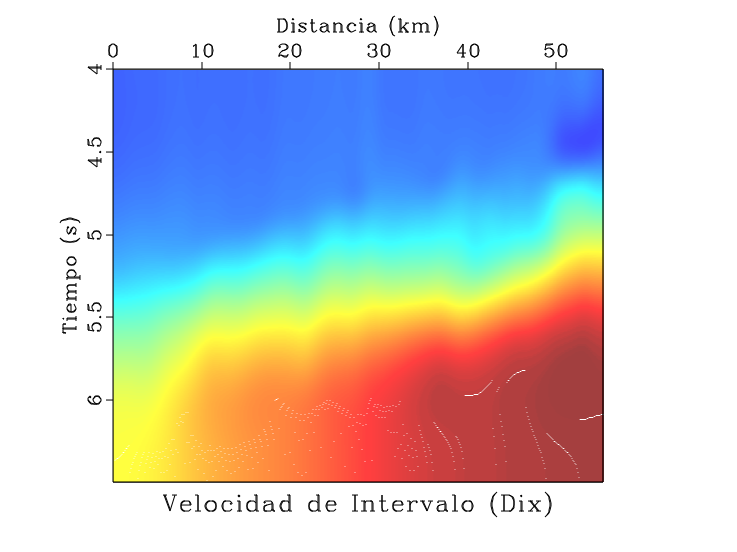

In [2]:
# Visualizar las gráficas generadas con Madagascar como imágenes 
m8r.Vplot('Fig/vel.vpl')

**Figura 9**. Modelo de velocidad de Dix.

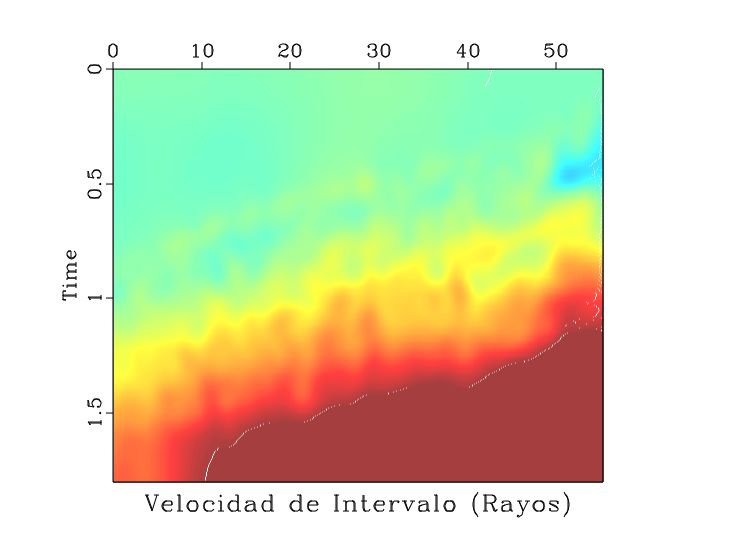

In [3]:
# Visualizar las gráficas generadas con Madagascar como imágenes 
m8r.Vplot('Fig/vcam.vpl')

**Figura 10**. Modelo de velocidad estimado mediante trazado de rayos.

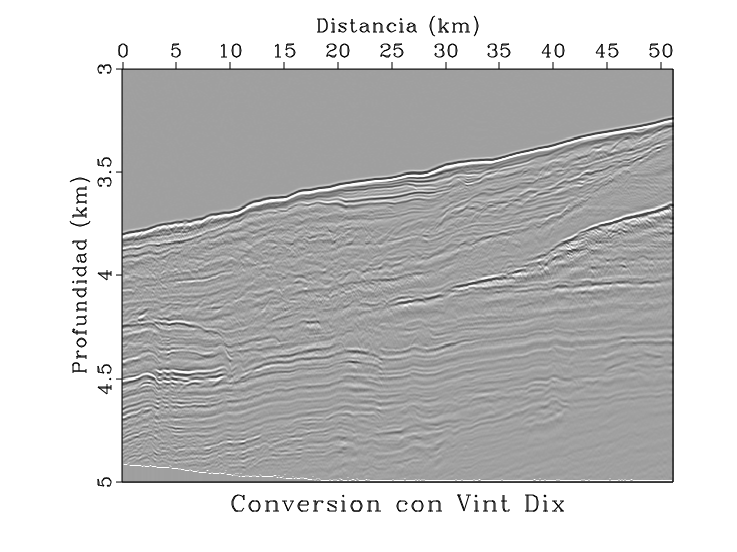

In [4]:
# Visualizar las gráficas generadas con Madagascar como imágenes 
m8r.Vplot('Fig/image.vpl')

**Figura 11**. Imagen sísmica convertida a profundidad con el modelo de velocidad de Dix.

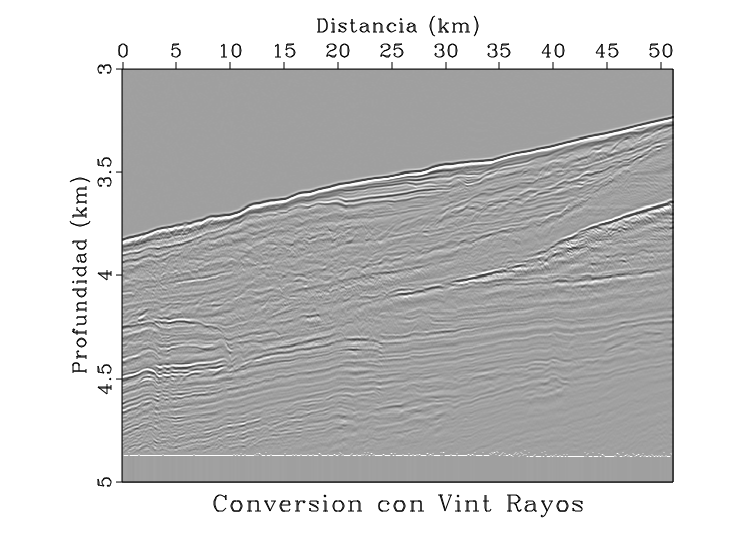

In [5]:
# Visualizar las gráficas generadas con Madagascar como imágenes 
m8r.Vplot('Fig/imagecam.vpl')

**Figura 12**. Imagen sísmica convertida a profundidad con el modelo de velocidad de rayos.

### 4.2 Ejemplo de conversión profundidad a tiempo 

En este ejemplo, se desea convertir una sección sísmica de profundidad a tiempo por medio de trazado de rayos (Cameron et al., 2008). Para ello, contamos con el modelo de velocidades de migración PSDM que también está en profundidad. Por lo que, primero aplicamos un filtro de media para suavizar el modelos y luego convertirlo a tiempo.

De la Fig. 13 a la Fig. 18, ilustramos el proceso de conversión de dominio de profundidad a tiempo con velocidad de Dix versus rayos.

In [6]:
import m8r            # Esta biblioteca es válida para Python 2.7 únicamente
import rsf.api        # Permite usar la sintaxis de Madagascar en el ambiente python
import numpy as np
import scipy.ndimage
import scipy.signal

import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
import platform
print(platform.python_version())

2.7.15


Con las siguientes instrucciones se convierte un archivo *.rsf (Madagascar) en formato *.np (NumPy) para manipularlo y graficarlo con herramientas de Python. Esto permitiría graficar un registro de pozo sobre la sección sísmica, o bien manipular las amplitudes sísmicas. 

In [8]:
input = rsf.api.Input('cubo_z.rsf')
n1=input.int("n3") #inline
n2=input.int("n2") #xline
n3=input.int("n1") #tiempo
data = np.zeros((n1,n2,n3),'f')
input.read(data)
#data = data.transpose()
shape = data.shape
print (shape) 

(361, 391, 1601)


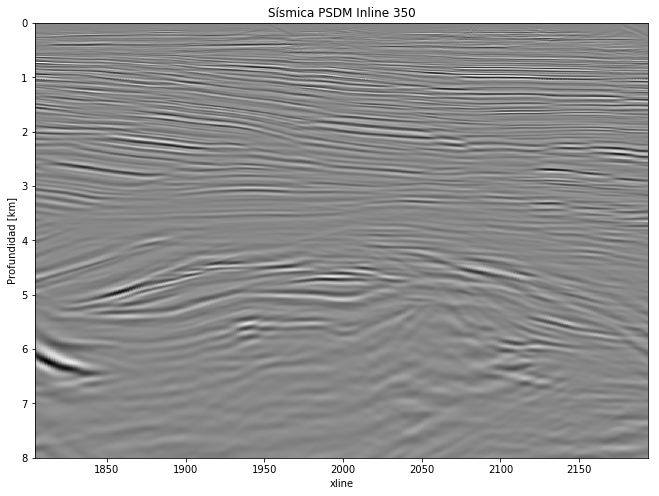

In [9]:
num_inline = 349   #f3=350
o2=1804
xline = np.linspace(1804, 2194, 391)  # start, end, num-points
prof = np.linspace(0,8,1601)

fig = plt.figure(figsize=(11, 8))
ax = fig.add_subplot(111)
#plt.pcolormesh(x, y, np.flipud(data[14,:,:].T))
plt.pcolormesh(xline, prof, data[num_inline,:,:].T, cmap='gray')
ax.set_aspect('auto')
ax.set_title(u'Sísmica PSDM Inline 350')
ax.set_xlabel('xline')
ax.set_ylabel('Profundidad [km]')
ax.set_ylim(8, 0)
plt.show()
fig.savefig('seccion_z_350.png')

**Figura 13**. Imagen sísmica original en el dominio de la profundidad.

In [10]:
input = rsf.api.Input('cubo_v.rsf')
n1=input.int("n3") #inline
n2=input.int("n2") #xline
n3=input.int("n1") #tiempo
v_data = np.zeros((n1,n2,n3),'f')
input.read(v_data)
#data = data.transpose()
shape = v_data.shape
print (shape) 

(361, 391, 1601)


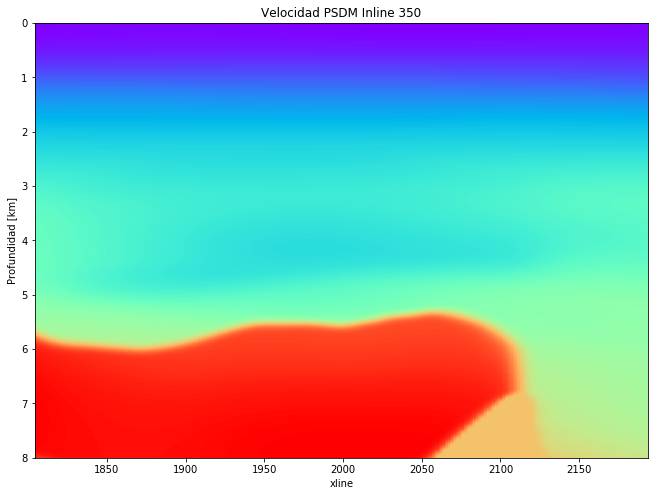

In [11]:
fig = plt.figure(figsize=(11, 8))
ax = fig.add_subplot(111)
plt.pcolormesh(xline, prof, v_data[num_inline,:,:].T, cmap='rainbow')
ax.set_aspect('auto')

ax.set_title(u'Velocidad PSDM Inline 350')
ax.set_xlabel('xline')
ax.set_ylabel('Profundidad [km]')
ax.set_ylim(8, 0)
plt.show()
fig.savefig('v_data_350.png')

**Figura 14**. Modelo original de velocidad RMS.

In [12]:
input = rsf.api.Input('smooth_v.rsf')
#n1=input.int("n3") #inline
n2=input.int("n2") #xline
n3=input.int("n1") #
v_smooth = np.zeros((n2,n3),'f')
input.read(v_smooth)
#data = data.transpose()
shape = v_smooth.shape
print (shape) 

(391, 1601)


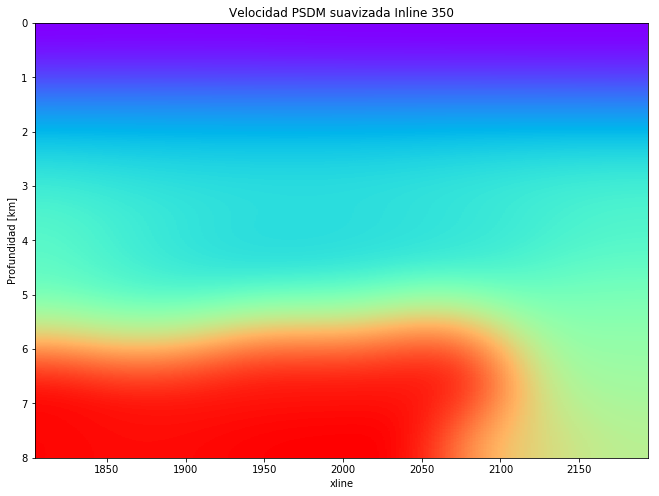

In [13]:
fig = plt.figure(figsize=(11, 8))
ax = fig.add_subplot(111)

plt.pcolormesh(xline, prof, v_smooth[:,:].T, cmap='rainbow')
ax.set_aspect('auto')

ax.set_title(u'Velocidad PSDM suavizada Inline 350')
ax.set_xlabel('xline')
ax.set_ylabel('Profundidad [km]')
ax.set_ylim(8, 0)
plt.show()
fig.savefig('v_smooth_350.png')

**Figura 15**. Modelo de velocidad RMS suavizado.

La velocidad de intervalo calculada con la ecuación de Dix es el modelo inicial para el proceso de inversión (método de Chebyshev; Cameron et al., 2008). 

In [14]:
input = rsf.api.Input('v_dixt1.rsf')
#n1=input.int("n3") #inline
n2=input.int("n2") #xline
n3=input.int("n1") #tiempo
v_dixt1 = np.zeros((n2,n3),'f')
input.read(v_dixt1)
#data = data.transpose()
shape = v_dixt1.shape
print (shape) 

(1250, 391)


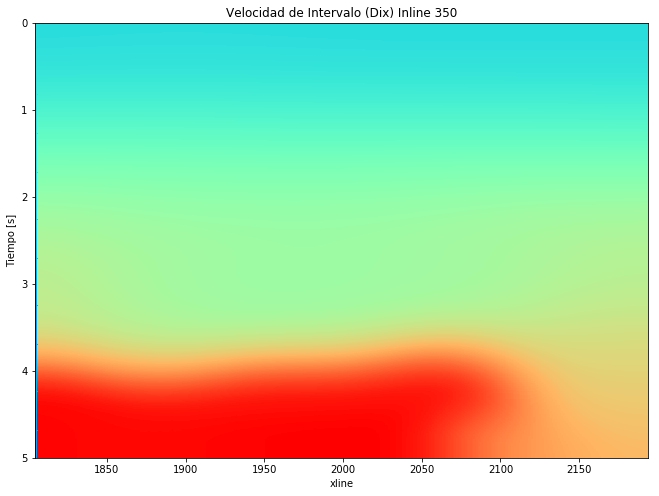

In [15]:
time = np.linspace(0,5,1250)

fig = plt.figure(figsize=(11, 8))
ax = fig.add_subplot(111)

plt.pcolormesh(xline, time, v_dixt1[:,:], cmap='rainbow')
ax.set_aspect('auto')

ax.set_title(u'Velocidad de Intervalo (Dix) Inline 350')
ax.set_xlabel('xline')
ax.set_ylabel('Tiempo [s]')
ax.set_ylim(5, 0)
plt.show()
fig.savefig('v_dixt1_350.png')

**Figura 16**. Modelo de velocidad de invervalo (Dix).

In [16]:
input = rsf.api.Input('v_cam.rsf')
#n1=input.int("n3") #inline
n2=input.int("n2") #xline
n3=input.int("n1") #profundidad
v_cam1 = np.zeros((n2,n3),'f')
input.read(v_cam1)
#data = data.transpose()
shape = v_cam1.shape
print (shape) 

(1601, 391)


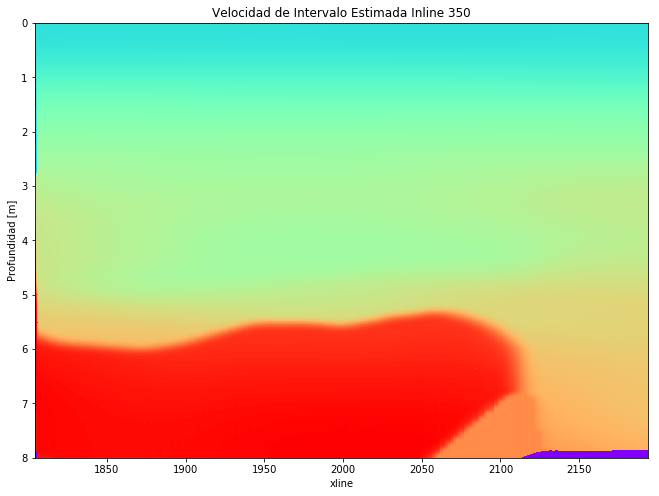

In [17]:
fig = plt.figure(figsize=(11, 8))
ax = fig.add_subplot(111)

plt.pcolormesh(xline, prof, v_cam1[:,:], cmap='rainbow')
ax.set_aspect('auto')

ax.set_title(u'Velocidad de Intervalo Estimada Inline 350')
ax.set_xlabel('xline')
ax.set_ylabel('Profundidad [m]')
ax.set_ylim(8, 0)
plt.show()
fig.savefig('v_cam1_350.png')

**Figura 17**. Modelo de velocidad estimado mediante trazado de rayos.

In [18]:
input = rsf.api.Input('seccion_t_conv2.rsf')
#n1=input.int("n3") #inline
n2=input.int("n2") #xline
n3=input.int("n1") #tiempo
sec_t2 = np.zeros((n2,n3),'f')
input.read(sec_t2)
#data = data.transpose()
shape = sec_t2.shape
print (shape) 

(391, 1205)


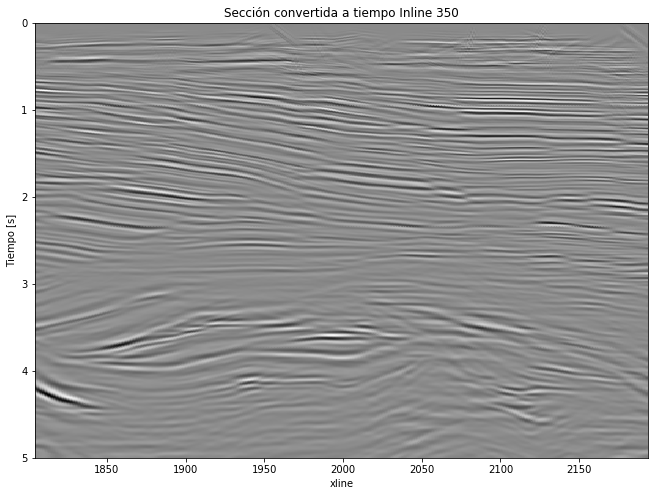

In [19]:
time2 = np.linspace(0,5,1205)

fig = plt.figure(figsize=(11, 8))
ax = fig.add_subplot(111)

plt.pcolormesh(xline, time2, sec_t2[:,:].T, cmap='gray')
ax.set_aspect('auto')

ax.set_title(u'Sección convertida a tiempo Inline 350')
ax.set_xlabel('xline')
ax.set_ylabel('Tiempo [s]')
ax.set_ylim(5, 0)
plt.show()
fig.savefig('sec_t2_350.png')

**Figura 18**. Imagen sísmica convertida a profunidad a través de la velocidad de trazado de rayos.

## 5. Referencias 

Al-Chalabi, M., 2014, _Principles of seismic velocities and time-to-depth conversion_: EAGE Publications.

Cameron, M., S. Fomel y J. Sethian, 2008, Time-to-depth conversion and seismic velocity estimation using time-migration velocity: Geophysics, Vol. 73, No. 5, VE205 - VE210. DOI: http://dx.doi.org/10.1190/1.2967501

Dix, C. H., 1955, Seismic velocities from surface measurements: Geophysics, Vol. 10, No.20, 68-86.

Fomel, S., 2015, Reproducible Research as a Community Effort: Lessons in the Madagascar Project: Computing in Science and Engineering, Vol. 7, 20-27.

Fomel, S., P. Sava, I. Vlad, Y. Liu, V. Bashkardin, 2013, Madagascar: open-source software project for multidimensional data analysis and reproducible computational experiments: Journal of Open Research Software, Vol 1 (e-8), 1-4.
(Disponible en http://openresearchsoftware.metajnl.com/articles/10.5334/jors.ag/)

Jones, I.F., 2009, Tutorial - Time conversion of depth migrated data: First Break, Vol. 27, No. 1, 51-55. 

Kulikowski, D., C. Hochwald y K. Amrouch, 2018, An automated cross-validation method to assess time-to-depth conversion accuracy: a case study on the Cooper and Eromanga basins, Australia: Geophysical Prospecting, 66, 1521-1534.

Oren, C., y R.L. Nowack, 2018, An overview of reproducible 3D seismic data processing and imaging using Madagascar, Geophysics, Vol. 83, No. 2, F9-F20.

Francis, A., 2018, A Simple Guide to Seismic Depth Conversion Part I: GEOExPro, v.15, No. 2.

